In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
# dataset path
dataset_path = r"C:\Users\shaje\Downloads\assignment_13\images"

In [7]:
# Load and preprocess the dataset
def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, img_size)  # Resize for consistency
            images.append(img)
    return np.array(images)

In [8]:
# Load dataset
images = load_images_from_folder(dataset_path)
images = images / 255.0  # Normalize pixel values to [0, 1]

In [9]:
# Split dataset into training and test sets
train_images, test_images = train_test_split(images, test_size=0.2, random_state=0)

In [11]:
train_images.shape

(4800, 64, 64, 3)

In [12]:
test_images.shape

(1200, 64, 64, 3)

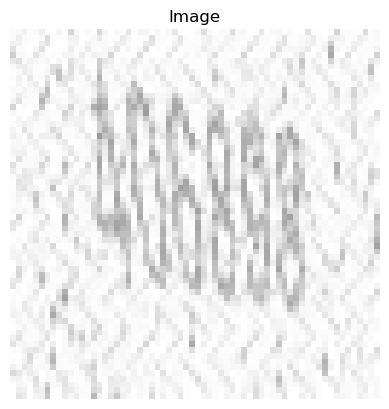

In [14]:
# Select an image from the training data
img = train_images[2]

# Plot the image
plt.imshow(img, cmap='viridis')
plt.title("Image")
plt.axis('off')  # Optional: turn off the axes
plt.show()

In [17]:
# Add noise to the images
noise_value = 0.2
train_images_noised = train_images + noise_value * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_images_noised = test_images + noise_value * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)

# Clip values to be between 0 and 1
train_images_noised = np.clip(train_images_noised, 0., 1.)
test_images_noised = np.clip(test_images_noised, 0., 1.)

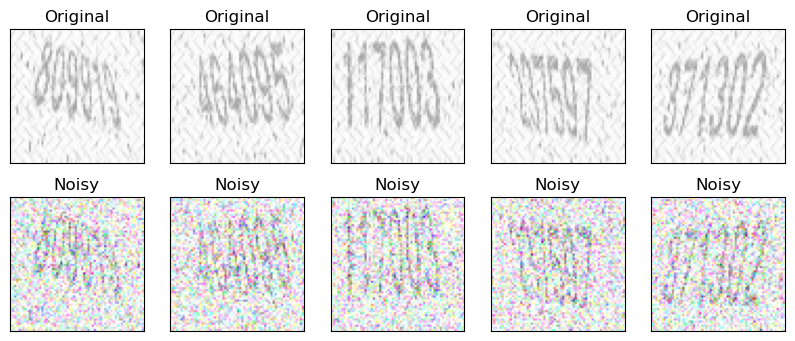

In [19]:
# Display a few original and noised images
n = 5

plt.figure(figsize=(10, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i])
    plt.title('Original')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_images_noised[i])
    plt.title('Noisy')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [21]:
# Build the autoencoder
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    output_img = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    return Model(input_img, output_img)

input_shape = train_images.shape[1:]  # Shape of each image
autoencoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(
    train_images_noised, train_images,
    epochs=20,
    batch_size=32,
    validation_data=(test_images_noised, test_images)
)

# Evaluate the autoencoder
loss = autoencoder.evaluate(test_images_noised, test_images)
print(f"Test Loss: {loss}")

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - loss: 0.0457 - val_loss: 0.0132
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 103ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - loss: 0.0132 - val_loss: 0.0132
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 11/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 12/20
150/150

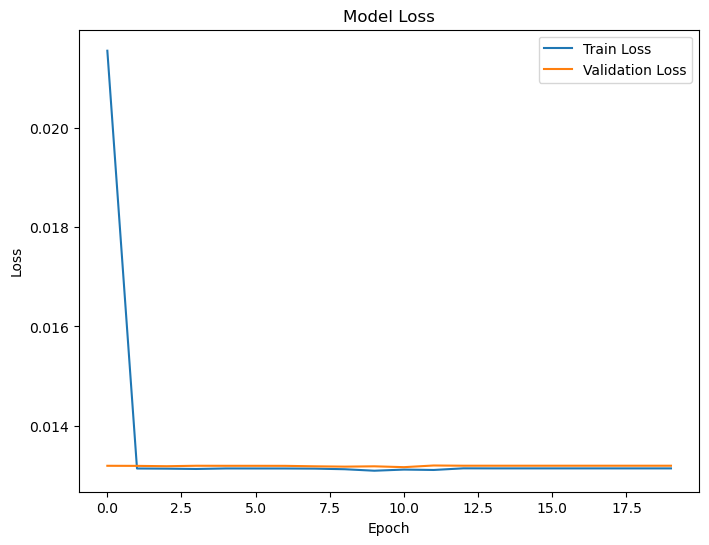

In [22]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


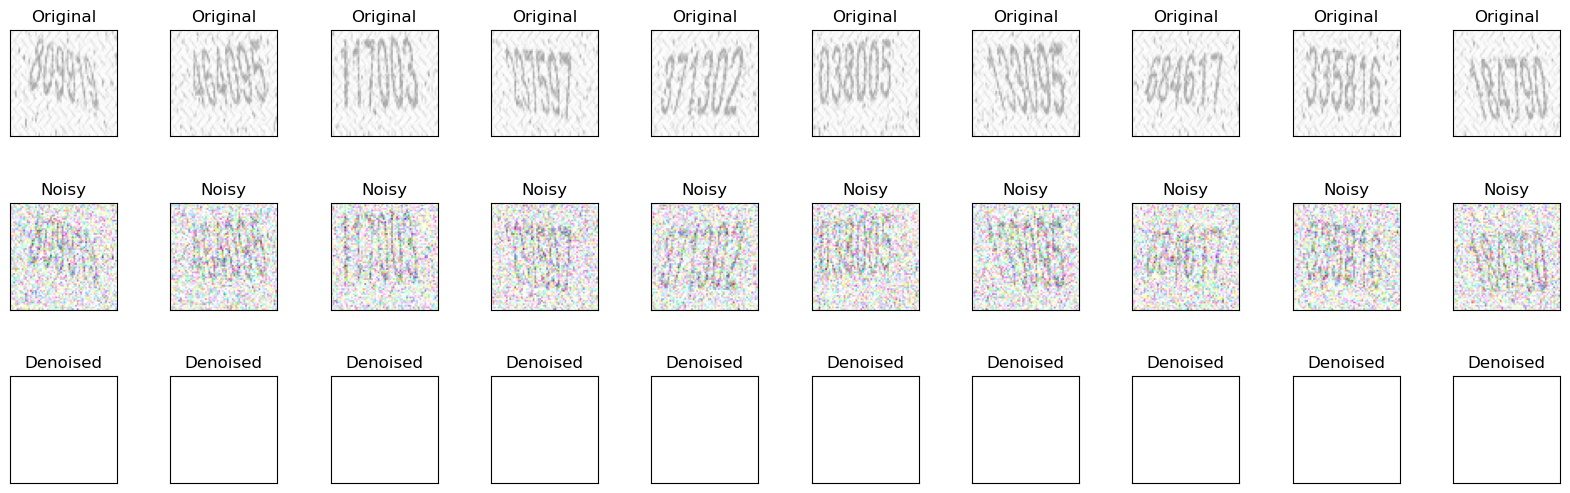

In [27]:
# Denoise some test images
decoded_imgs = autoencoder.predict(test_images_noised)

# Plot the original, noisy, and denoised images
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_images[i])
    plt.title('Original')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(test_images_noised[i])
    plt.title('Noisy')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i])
    plt.title('Denoised')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Adjust the vertical space between rows
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()